DEBUG:poppy:Trans: C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\pupil_SPC-20200617_1000.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\pupil_SPC-20200617_1000.fits
DEBUG:poppy:Trans: C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\SPM_SPC-20200617_1000_rounded9.fits
DEBUG:poppy:OPD: None
INFO:poppy:SPM: Loaded amplitude transmission from C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\SPM_SPC-20200617_1000_rounded9.fits
DEBUG:poppy:Trans: C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\LS_SPC-20200617_1000.fits
DEBUG:poppy:OPD: None
INFO:poppy:Lyot Stop: Loaded amplitude transmission from C:\Users\Kian\Desktop\roman-cgi-phasec-data\spc-spec-compact\LS_SPC-20200617_1000.fits


7.3e-07 m


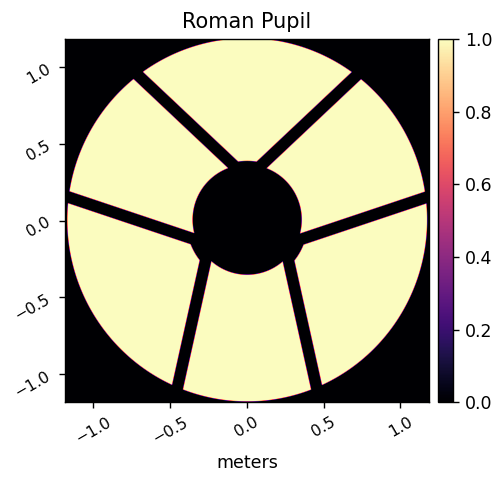

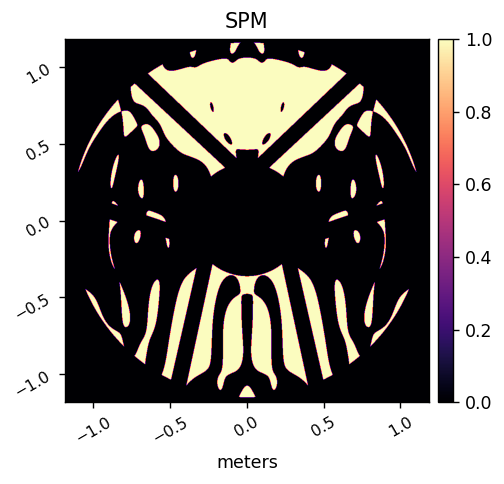

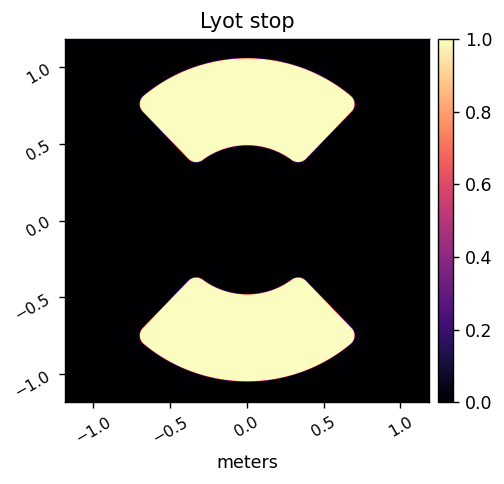

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Roman Pupil
INFO:poppy:Added pupil plane: DM1 Plane (No Optic)
INFO:poppy:Added pupil plane: DM2 Plane (No Optic)
INFO:poppy:Added pupil plane: SPM
INFO:poppy:Added image plane: FPM Plane (No Optic)
INFO:poppy:Added pupil plane: Lyot Stop
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
DEBUG:poppy:Padded WF array for oversampling by 2.000, to (2000, 2000).
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 7.3e-07 m
DEBUG:poppy:Input wavefront has wavelength=7.3e-07 m, npix=1000, diam=2.37, pixel scale=0.00237 meters/pixel
DEBUG:poppy:  Wavefront and optic Roman Pupil already at same plane type, no propagation needed.
DEBUG:poppy:Non-matching pixel scales for wavefront and optic. Need to i

Not employing polarization aberrations.


DEBUG:poppy:resampled optic to match wavefront via spline interpolation by a zoom factor of 0.998
DEBUG:poppy:resampled optic shape: (1000, 1000)   wavefront shape: (1000, 1000)
DEBUG:poppy:trimmed a border of 0 x 0 pixels from optic to match the wavefront
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Roman Pupil 
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Wavefront and optic DM1 Plane (No Optic) already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: DM1 Plane (No Optic)
DEBUG:poppy:  Wavefront and optic DM2 Plane (No Optic) already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: DM2 Plane (No Optic)
DEBUG:poppy:  Wavefront and optic SPM already at same plane type, no propagation needed.
DEBUG:poppy:Non-matching pixel scales for wavefront and optic. Need to interpolate. Pixelscales: wave 0.002367840228 m / pix, optic 0.002363114

PSF calculated in 1.31s
(1000, 1000) 0.005 arcsec / pix


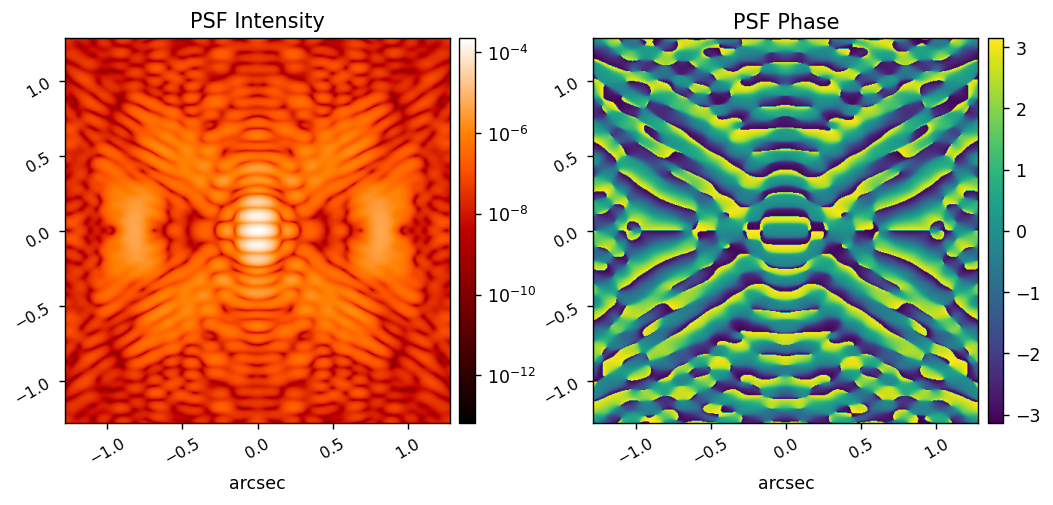

In [9]:
import numpy as np
import astropy.units as u
from pathlib import Path
from importlib import reload

import poppy_roman_cgi_phasec as cgi
from poppy_roman_cgi_phasec import spc_compact as spc
from poppy_roman_cgi_phasec import misc
reload(spc)

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

mode = 'SPC730'
lambda_m = 770e-9*u.m
lambda_m = np.linspace(730e-9 - 730e-9*.1/2, 730e-9 + 730e-9*.1/2,7)*u.m
lambda_m = None

polaxis = 0
cgi_dir = Path('C:/Users/Kian/Desktop/roman-cgi-phasec-data')

psf, wfs = spc.run(mode=mode,
                   lambda_m=lambda_m,
                   npix=1000,
                   oversample=2,
                   npsf=512,
#                    pixelscale_lamD=0.1,
#                    offsets=(4.5,0),
#                    dm1_fname='spc_spec_band3_best_contrast_dm1.fits', dm2_fname='spc_spec_band3_best_contrast_dm2.fits',
                   use_fpm=False,
                   polaxis=polaxis,
                   cgi_dir=cgi_dir,
                   display_mode=False,
#                    display_inwave=True,
                   display_intermediates=False,
#                    display_fpm=True,
                   display_psf=True)

In [10]:
1024*0.0048828

4.9999872

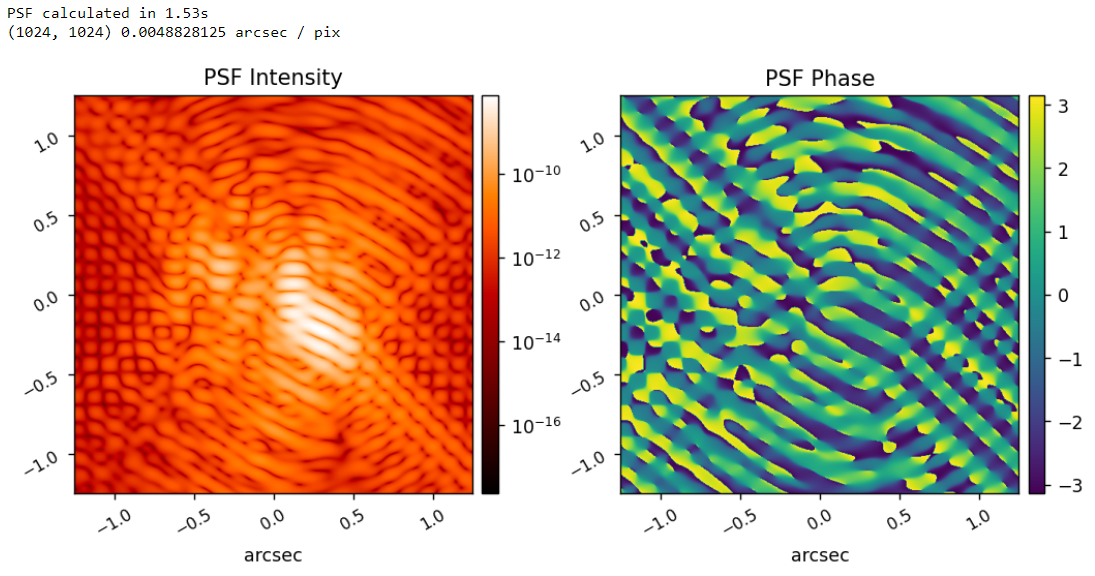

(1000, 1000)


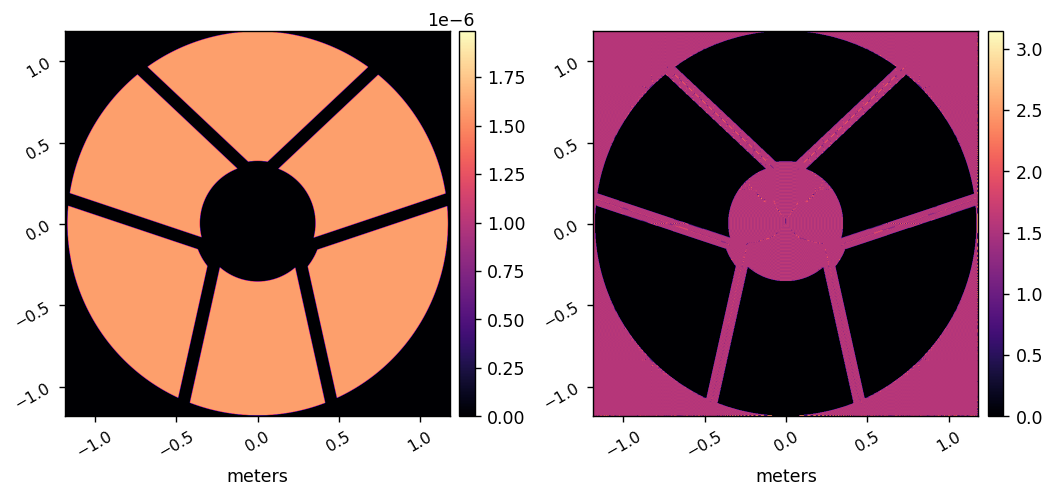

(1000, 1000)


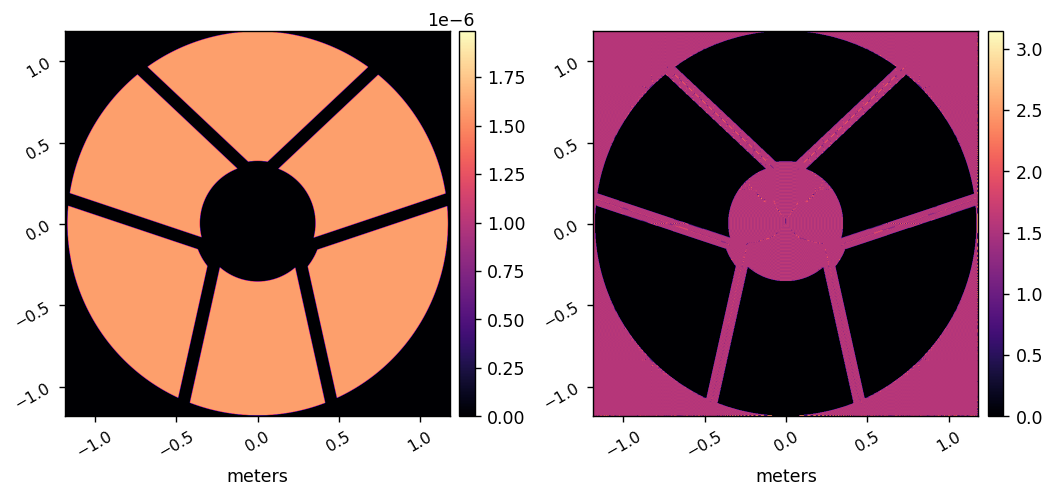

(1000, 1000)


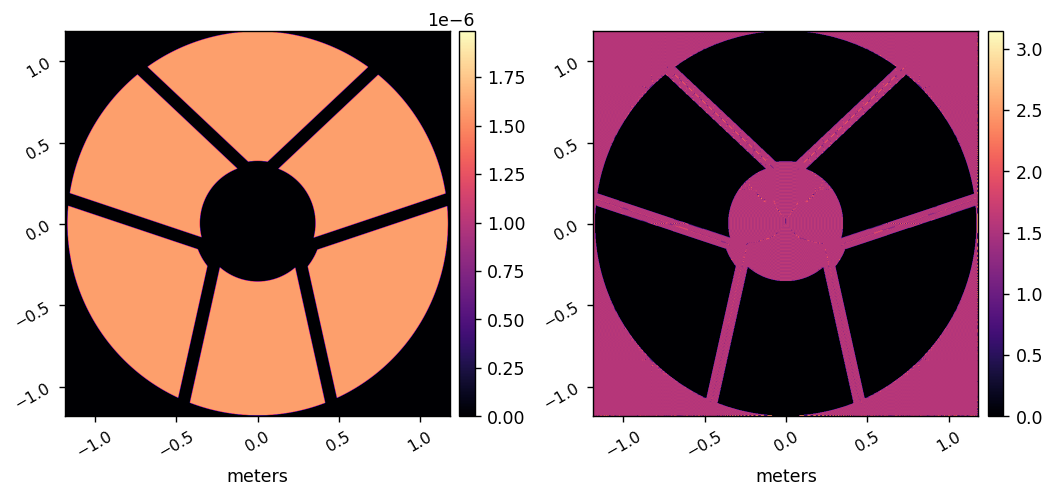

(1000, 1000)


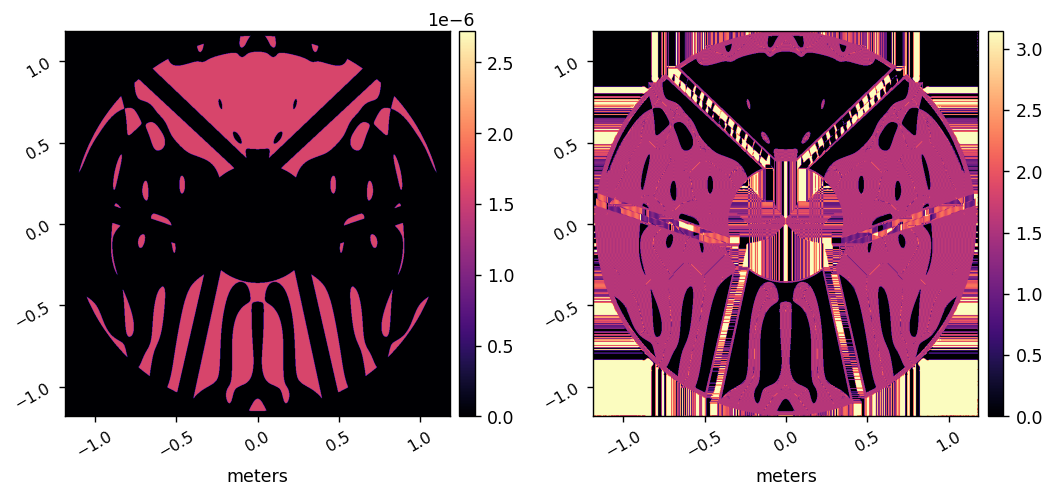

(2048, 2048)


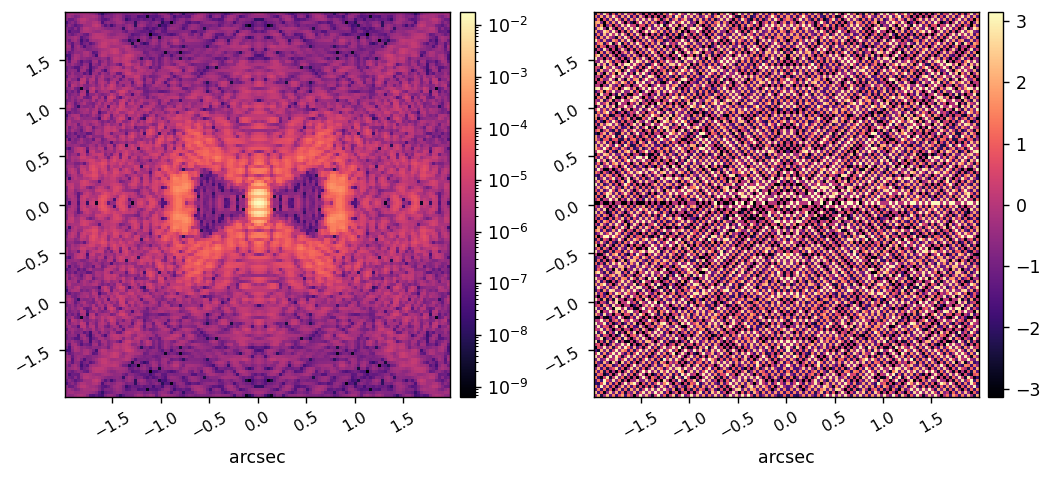

(2048, 2048)


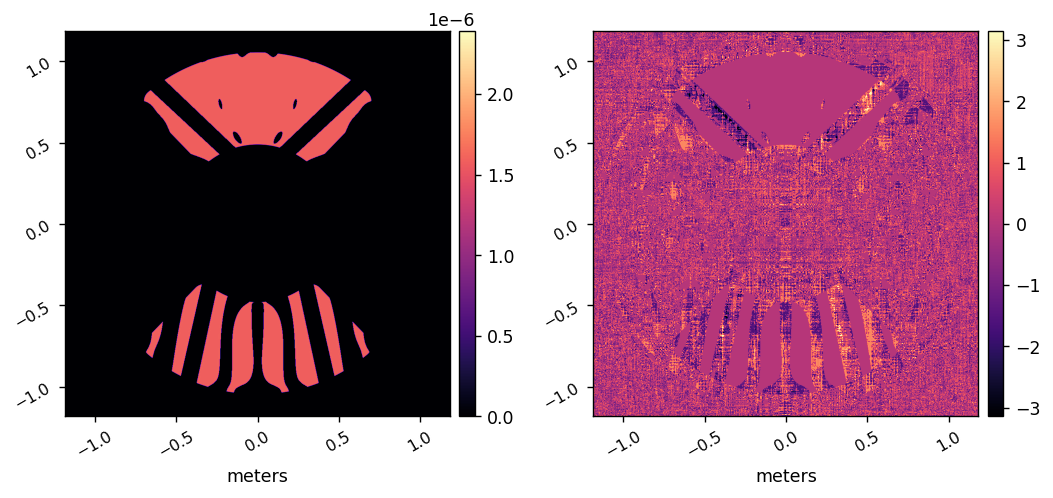

(1024, 1024)


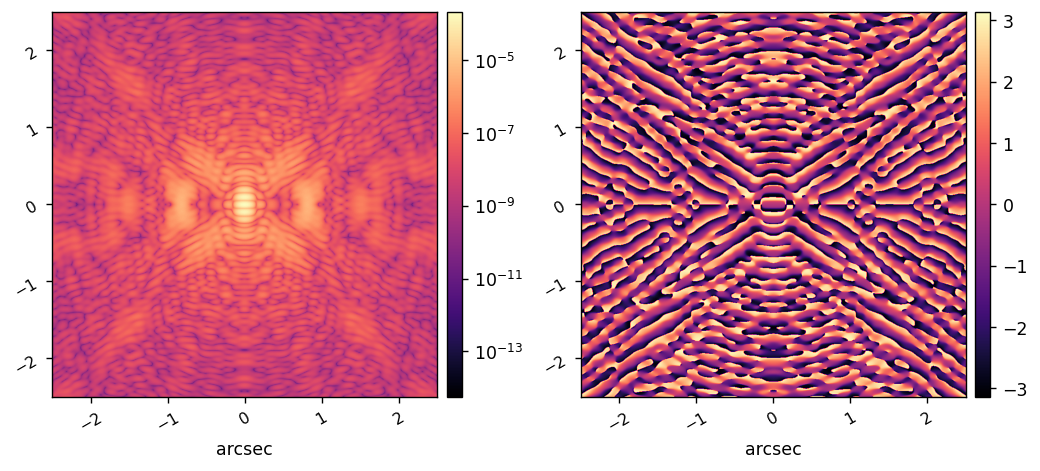

In [16]:
for i,wf in enumerate(wfs):
    print(wf.intensity.shape)
    if i==4: misc.myimshow2(wf.intensity, wf.phase, pxscl=wf.pixelscale, npix=128, lognorm1=True)
    elif i==5: misc.myimshow2(wf.intensity, wf.phase, pxscl=wf.pixelscale, npix=1000)
    elif i==6: misc.myimshow2(wf.intensity, wf.phase, pxscl=wf.pixelscale, lognorm1=True)
    else: misc.myimshow2(wf.intensity, wf.phase, pxscl=wf.pixelscale)

In [3]:
wfdir=Path('C:/Users/Kian/Desktop/roman-waves/phasec/spc-spec')
cgi.utils.save_waves(wfs, use_opds, use_apertures, wfdir, npix=1000)

Saving wavefronts: 
0 Saved pupil wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_pupil_poppy.fits
1 Saved primary wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_primary_poppy.fits
2 Saved secondary wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_secondary_poppy.fits
3 Saved pomafold wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_pomafold_poppy.fits
4 Saved m3 wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_m3_poppy.fits
5 Saved m4 wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_m4_poppy.fits
6 Saved m5 wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_m5_poppy.fits
7 Saved ttfold wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_ttfold_poppy.fits
8 Saved fsm wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_fsm_poppy.fits
9 Saved oap1 wavefront to C:\Users\Kian\Desktop\roman-waves\phasec\spc-wide\wf_oap1_poppy.fits
10 Saved focm 

No DMs loaded.


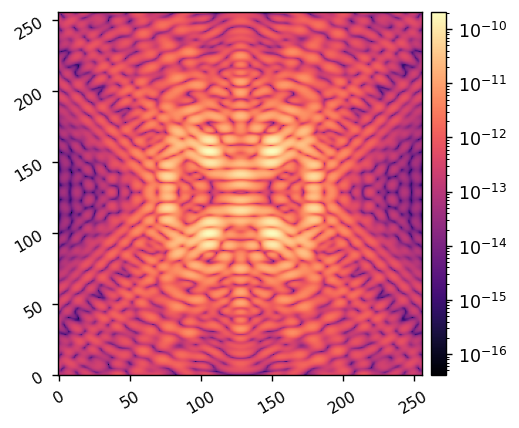

In [13]:
import proper
import roman_phasec_proper

cor_type = 'spc-spec'
nlam = 1
lam_array = np.array([0.730])
# lam_array = np.array([0.770])

n = 256                 # output image dimension (must be power of 2)
final_sampling = 0.2    # output sampling in lam0/D

xoffset = 0
use_fpm = 1
polaxis = 0

use_dms = 0
if use_dms==1: 
    use_dm1 = 1
    use_dm2 = 1
    dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '\\examples\\spc_spec_band3_best_contrast_dm1.fits' )
    dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '\\examples\\spc_spec_band3_best_contrast_dm2.fits' )
    print('Loaded DMs.')
else: 
    use_dm1 = 0
    use_dm2 = 0
    dm1 = 0
    dm2 = 0
    print('No DMs loaded.')
    
# (wfs, wfs_sampling_m) = proper.prop_run_multi('roman_phasec_compact', lam_array, n, QUIET=False, 
#                                                 PASSVALUE={'cor_type':cor_type,
#                                                            'final_sampling_lam0':final_sampling, 
#                                                            'source_x_offset':xoffset,
#                                                            'use_fpm':use_fpm,
#                                                           })
# proper_psf = wfs[0]
# psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix
#     
# misc.myimshow2(np.abs(proper_psf)**2, np.angle(proper_psf),
#                'PROPER PSF Intensity', 'PROPER PSF Phase',
#                pxscl=psf_sampling_m.to(u.mm/u.pix),
#                lognorm1=True, cmap1='gist_heat', cmap2='viridis')

# nlam = 7
# minlam = 0.669
# maxlam = 0.791
# lam_array = np.linspace( minlam, maxlam, nlam )

(fields, sampling) = proper.prop_run_multi('roman_phasec_compact', lam_array, n, QUIET=True, \
                                           PASSVALUE={'cor_type':'spc-spec_band3',
                                                      'final_sampling_lam0':final_sampling,
                                                      'use_fpm':use_fpm} )
images = np.abs(fields)**2
image_noab = np.sum( images, 0 ) / nlam

misc.myimshow(image_noab, lognorm=True)

In [3]:
print(sampling)

[0.]


In [33]:
np.abs(proper_psf)**2

array([[3.05680224e-14, 3.05409983e-14, 3.02008104e-14, ...,
        2.97849817e-14, 3.02008104e-14, 3.05409983e-14],
       [2.67303508e-14, 2.55462449e-14, 2.45305012e-14, ...,
        2.39868044e-14, 2.45305012e-14, 2.55462449e-14],
       [2.20725380e-14, 1.97576761e-14, 1.80908236e-14, ...,
        1.74270660e-14, 1.80908236e-14, 1.97576761e-14],
       ...,
       [1.73826493e-14, 1.40609166e-14, 1.17947782e-14, ...,
        1.09717928e-14, 1.17947782e-14, 1.40609166e-14],
       [2.20725380e-14, 1.97576761e-14, 1.80908236e-14, ...,
        1.74270660e-14, 1.80908236e-14, 1.97576761e-14],
       [2.67303508e-14, 2.55462449e-14, 2.45305012e-14, ...,
        2.39868044e-14, 2.45305012e-14, 2.55462449e-14]])

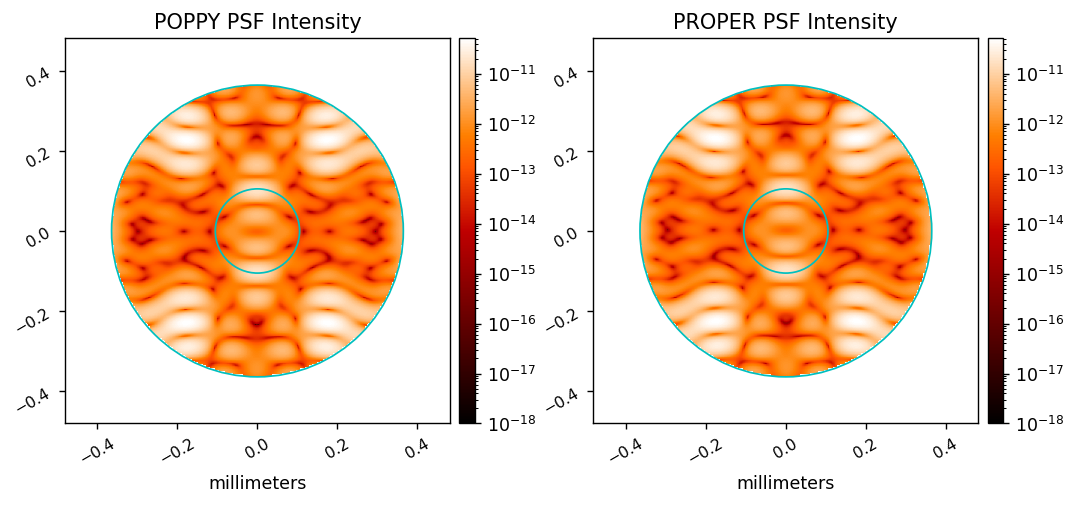

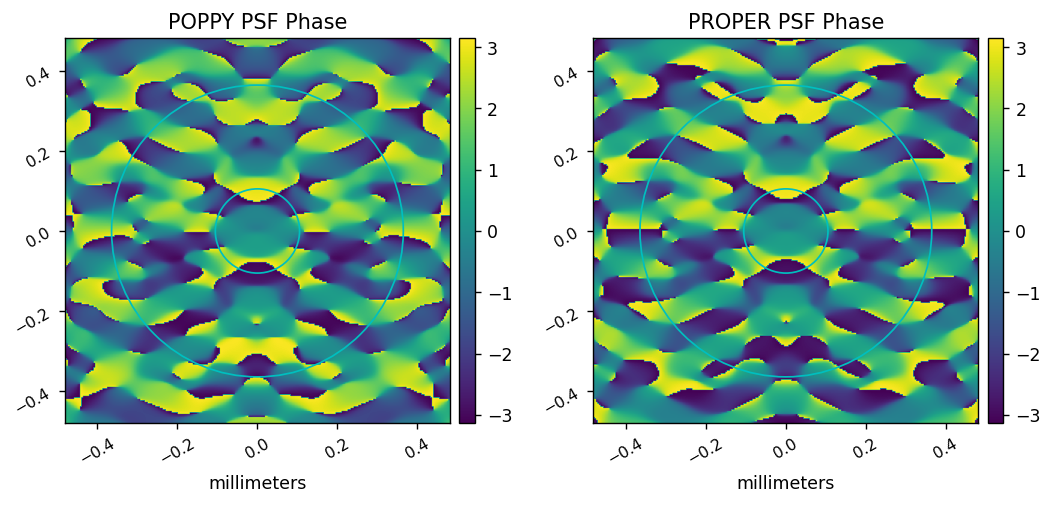

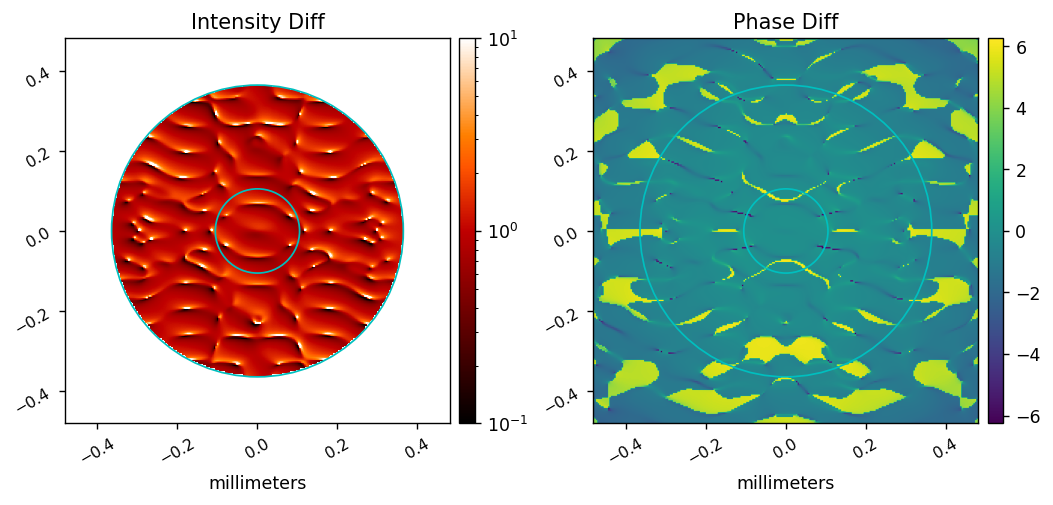

9.985113455694098e-08
9.991340475604955e-08


In [6]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle

pop_int = rotate(np.abs(psf)**2, 180)
pop_phs = rotate(np.angle(psf), 180)
prop_int = np.abs(proper_psf)**2
prop_phs = np.angle(proper_psf)

iwa=2.8
owa=9.7
pop_int = misc.mask_psf(pop_int, pixelscale=psf_sampling_m.value, pixelscale_lamD=0.1, iwa=None, owa=owa)
prop_int = misc.mask_psf(prop_int, pixelscale=psf_sampling_m.value, pixelscale_lamD=0.1, iwa=None, owa=owa)

psfs = np.ma.concatenate([pop_int, prop_int])
vmin=np.ma.min(psfs)
vmax=np.ma.max(psfs)
# vmax = 1e-12
vmin = 1e-18

innwa = iwa/final_sampling*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = owa/final_sampling*psf_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(pop_int, prop_int, 'POPPY PSF Intensity', 'PROPER PSF Intensity',
               cmap1='gist_heat', cmap2='gist_heat', 
               lognorm1=True, lognorm2=True, vmin1=vmin, vmax1=vmax, vmin2=vmin, vmax2=vmax,
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               patches1=patches1, patches2=patches2)
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(pop_phs, prop_phs, 'POPPY PSF Phase', 'PROPER PSF Phase',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               cmap1='viridis', cmap2='viridis', patches1=patches1, patches2=patches2)

# Difference
int_diff = np.abs(pop_int-prop_int)
phs_diff = pop_phs-prop_phs
int_diff = pop_int/prop_int
# phs_diff = np.abs(pop_phs/prop_phs)
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(int_diff, phs_diff,
               'Intensity Diff', 'Phase Diff',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, 
               vmin1=0.1, vmax1=10, 
#                vmin2=0, vmax2=3,
               cmap1='gist_heat', cmap2='viridis',  
               patches1=patches1, patches2=patches2)
np.ma.mean(int_diff)
print(np.ma.sum(pop_int))
print(np.ma.sum(prop_int))

In [2]:
import poppy
from poppy_roman_cgi_phasec import optics
import astropy.units as u
from importlib import reload
import misc
import numpy as np

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 


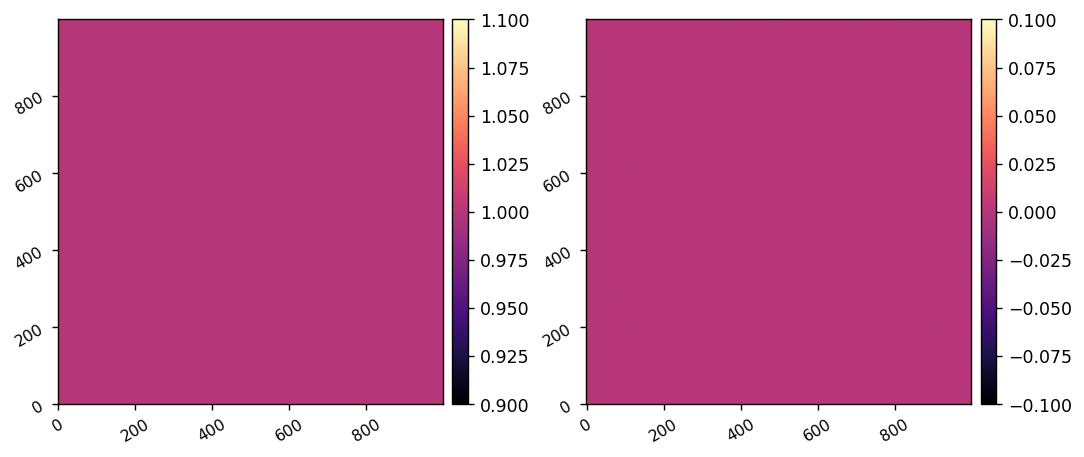

DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m


[2.55445129 2.64906059 2.7436699  2.83827921 2.93288851 3.02749782
 3.12210713] m2


UnitsError: Argument 'f_lens' to function '__init__' must be in units convertable to 'm'.

In [6]:
reload(optics)

npix = 1000
oversample = 1
D = 2.36*u.m
lambda_m = 730e-9
wf = poppy.FresnelWavefront(beam_radius=D/2, wavelength=lambda_m, npix=npix, oversample=oversample)
misc.myimshow2(np.abs(wf.wavefront)**2,np.angle(wf.wavefront))

fl_pri = 2.838279206904720*u.m
primary = poppy.QuadraticLens(fl_pri, name='Primary')

fl_pri = np.linspace(fl_pri-0.1*fl_pri, fl_pri+0.1*fl_pri, 7)*u.m
print(fl_pri)
primary = optics.ChromaticQuadraticLens(fl_pri, name='Primary')

wf.apply_lens_power(primary)
misc.myimshow2(np.abs(wf.wavefront)**2,np.angle(wf.wavefront))